# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Evlin
- Email: evelinsitanggang@gmail.com
- Id Dicoding: evlinzxxx

### **Cakupan Proyek**

**1. Tujuan Proyek:**
   
   Mengembangkan model prediksi untuk mengidentifikasi kemungkinan mahasiswa yang akan dropout (keluar) berdasarkan faktor-faktor seperti kondisi akademik, sosial ekonomi, dan demografis.

**2. Sumber Data:**
   - **Dataset:** Dataset yang terdiri dari 4.424 baris dan 37 kolom yang mencakup data demografis, kondisi akademik, dan faktor sosial ekonomi mahasiswa.
   - **Variabel target:** Status mahasiswa, dengan nilai **Graduate (0)** dan **Dropout (1)**.

**3. Proses Analisis dan Persiapan Data:**
   - **Eksplorasi Data Awal (EDA):**
     - Menyajikan statistik deskriptif dan menghitung distribusi status mahasiswa.
     - Visualisasi distribusi status mahasiswa (Graduate, Dropout, Enrolled).
     - Menilai hubungan antara fitur-fitur numerik dengan status mahasiswa menggunakan visualisasi histogram dan boxplot.
     - Menilai hubungan antara fitur kategorikal dengan status mahasiswa melalui countplot.
   - **Pembersihan Data:**
     - Memastikan tidak ada nilai yang hilang (missing values) dan data duplikat.
     - Menghapus fitur yang tidak relevan untuk analisis prediksi, seperti faktor ekonomi makro yang memiliki korelasi rendah dengan status mahasiswa.
     - Menyiapkan data untuk digunakan dalam model prediksi (encoding untuk status dan fitur numerik).
     
**4. Pemilihan Model:**
   - **Model yang digunakan:** **Random Forest Classifier** dipilih karena kemampuannya untuk menangani dataset yang besar dan kompleks dengan banyak fitur, serta memberikan interpretasi yang mudah terhadap hasilnya.
   - **Proses Pengujian Model:**
     - Menyusun pipeline yang mencakup preprocessing (standard scaling untuk fitur numerik) dan pelatihan model.
     - Penggunaan **GridSearchCV** untuk mencari kombinasi hyperparameter terbaik dengan menggunakan 5-fold cross-validation.
     - Menyusun model terbaik dan mengevaluasi hasil prediksi pada data uji.
   - **Evaluasi Model:** Model dievaluasi menggunakan metrik akurasi, dan **confusion matrix** digunakan untuk melihat kinerja model dalam membedakan antara status Graduate dan Dropout.

**5. Hasil dan Analisis:**
   - **Akurasi Model:** Model menunjukkan akurasi sebesar **90.22%** pada data uji, menandakan bahwa Random Forest Classifier dapat memprediksi status mahasiswa dengan cukup baik.
   - **Confusion Matrix:** Menunjukkan berapa banyak data yang diklasifikasikan dengan benar sebagai Graduate dan Dropout, serta kesalahan yang terjadi pada setiap kelas.
   - **Pentingnya Fitur:** Analisis korelasi menunjukkan bahwa faktor akademik seperti nilai pada semester pertama dan kedua sangat memengaruhi hasil prediksi, sementara faktor ekonomi makro memiliki korelasi yang sangat rendah dengan status mahasiswa.

**6. Implementasi dan Penggunaan Model:**
   - **Model Prediksi:** Setelah pelatihan model, hasil terbaik disimpan dalam file `.pkl` untuk digunakan di aplikasi prediksi di masa depan.
   - **Tantangan dan Kesimpulan:**
     - Model ini dapat digunakan oleh institusi pendidikan untuk mengidentifikasi mahasiswa yang berisiko dropout dan memberikan intervensi yang tepat waktu untuk meningkatkan angka kelulusan.
     - Tantangan utama adalah memastikan data yang digunakan relevan dan berkualitas tinggi, serta menyesuaikan model dengan perubahan kondisi sosial dan ekonomi yang mungkin terjadi di masa depan.

## Persiapan

### Menyiapkan library yang dibutuhkan

In [29]:
import os
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from joblib import dump, load

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

### Menyiapkan data yang akan diguankan

## Data Understanding

In [3]:
# set maximum display column
pd.set_option('display.max_columns', None)

In [52]:
# read csv into dataframe
df = pd.read_csv('/content/drive/MyDrive/Dataset/dropout.csv',delimiter=';')

# show information columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
# show 5 first data
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
# calculate missing value
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


tidak ada data yang mengalami missing value atau nilai kosong

In [7]:
# calculate duplicated data
df.duplicated().sum()

0

tidak ada juga data yang ganda atau terduplikasi

In [8]:
# show describe
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Dataset yang diberikan terdiri dari 4.424 baris dan 37 kolom, mencakup berbagai fitur yang mencerminkan karakteristik individu terkait pendidikan, kondisi sosial ekonomi, dan hasil akademik. Seluruh data terisi lengkap tanpa adanya missing value, yang memastikan tidak diperlukan langkah tambahan untuk imputasi data. Selain itu, tidak ditemukan data duplikat, sehingga dataset ini sudah siap digunakan untuk analisis lebih lanjut tanpa perlu proses deduplikasi. Jenis data yang tersedia mencakup 29 kolom dengan tipe integer, 7 kolom dengan tipe float, dan 1 kolom bertipe object, yaitu kolom **Status**, yang merupakan variabel target. Fitur-fitur dalam dataset mencakup informasi demografis seperti status pernikahan dan usia saat mendaftar, kondisi akademik seperti nilai penerimaan dan jumlah unit kurikulum yang diambil, serta faktor ekonomi makro seperti tingkat pengangguran, inflasi, dan GDP.

## Exploratory Data Analysis

In [9]:
# Menghitung jumlah student berdasarkan status
df.Status.value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


Berdasarkan data diatas, berikut adalah beberapa insight yang bisa ditarik:

1. **Jumlah Mahasiswa berdasarkan Status:**
   - Terdapat **2209** mahasiswa yang berstatus **Graduate** (lulus).
   - Terdapat **1421** mahasiswa yang berstatus **Dropout** (keluar).
   - Terdapat **794** mahasiswa yang masih **Enrolled** (terdaftar).

2. **Persentase Mahasiswa Berdasarkan Status:**

   Dari data tersebut terlihat bahwa **42.91%** mahasiswa telah lulus, **27.44%** mahasiswa keluar sebelum menyelesaikan studi, dan **15.35%** mahasiswa masih terdaftar tetapi belum lulus.

3. **Tren Dropout yang Signifikan:**
   
   Dengan **27.44%** mahasiswa yang drop out, ini menunjukkan bahwa sekitar seperempat dari mahasiswa tidak berhasil menyelesaikan studinya.


In [10]:
# Pisahkan student yang berstatus Enrolled, untuk selanjutnya di prediksi meggunakan model machine learning
df_enrolled = df[df.Status=='Enrolled']
df = df[~(df.Status=='Enrolled')]

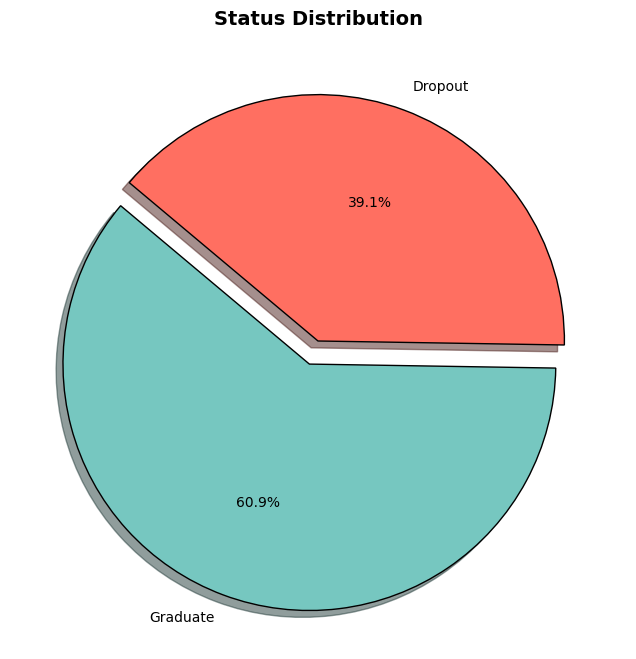

In [12]:
# Menghitung jumlah setiap status
status_counts = df['Status'].value_counts()

# Warna yang lebih bervariasi dan eksplosi
colors = ['#76c7c0', '#ff6f61']
explode = [0.1, 0]  # Membuat slice pertama (misalnya, status pertama) sedikit meledak keluar

# Membuat pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Status Distribution', fontsize=14, fontweight='bold')
plt.show()


Insight:  
- **Student graduate** mendominasi lebih dari setengah dengan angka mencapai **60.9%**, menunjukkan mayoritas mahasiswa berhasil menyelesaikan studi mereka.  
- **Student dropout** mencapai **39.1%**, yang mengindikasikan hampir 4 dari 10 mahasiswa tidak menyelesaikan pendidikan mereka.  
- Perbandingan ini menunjukkan adanya tantangan yang signifikan dalam mempertahankan mahasiswa hingga lulus, sehingga dapat menjadi fokus analisis lebih lanjut untuk mengidentifikasi faktor-faktor penyebab dropout dan strategi untuk meningkatkannya.

In [13]:
categorical_columns = [
    'Marital_status', 'Application_mode', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification',
    'Nacionality','Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation','Displaced',
    'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
    'Gender', 'Scholarship_holder', 'International'
]

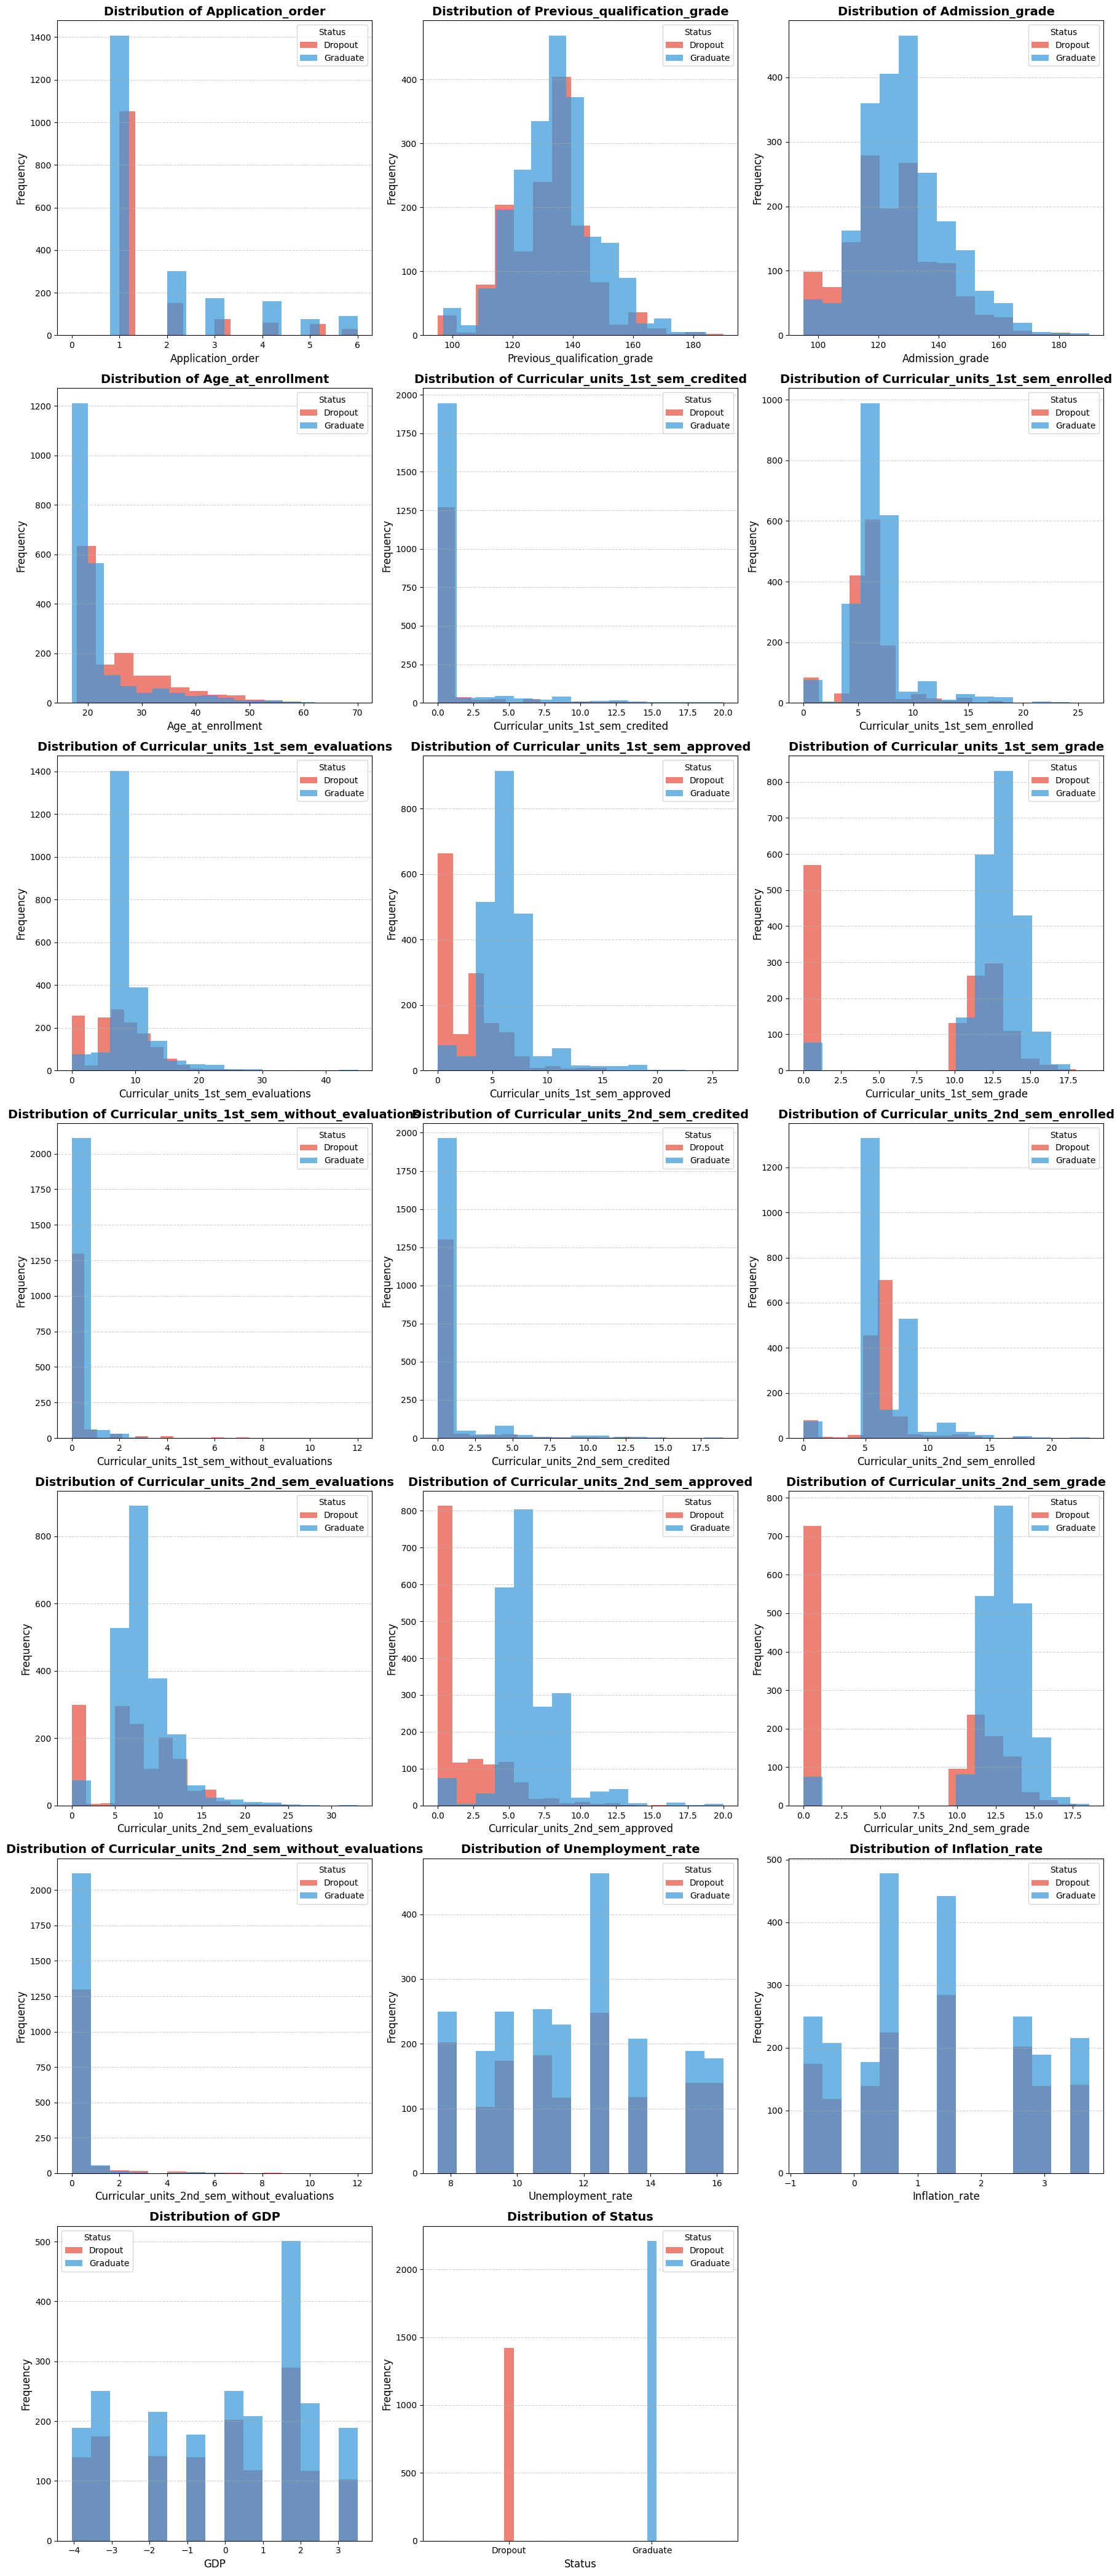

In [19]:
colors = {'Graduate': '#3498db', 'Dropout': '#e74c3c'}

# Jumlah kolom untuk grid subplot
num_cols = 3
num_rows = -(-len(numeric_columns) // num_cols)  # Pembagian pembulatan ke atas

# Membuat subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows))
axes = axes.flatten()

# Loop melalui setiap kolom numerik
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    for status in df['Status'].unique():
        subset = df[df['Status'] == status]
        ax.hist(subset[column], bins=15, alpha=0.7, label=status, color=colors[status])
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    ax.legend(title='Status', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

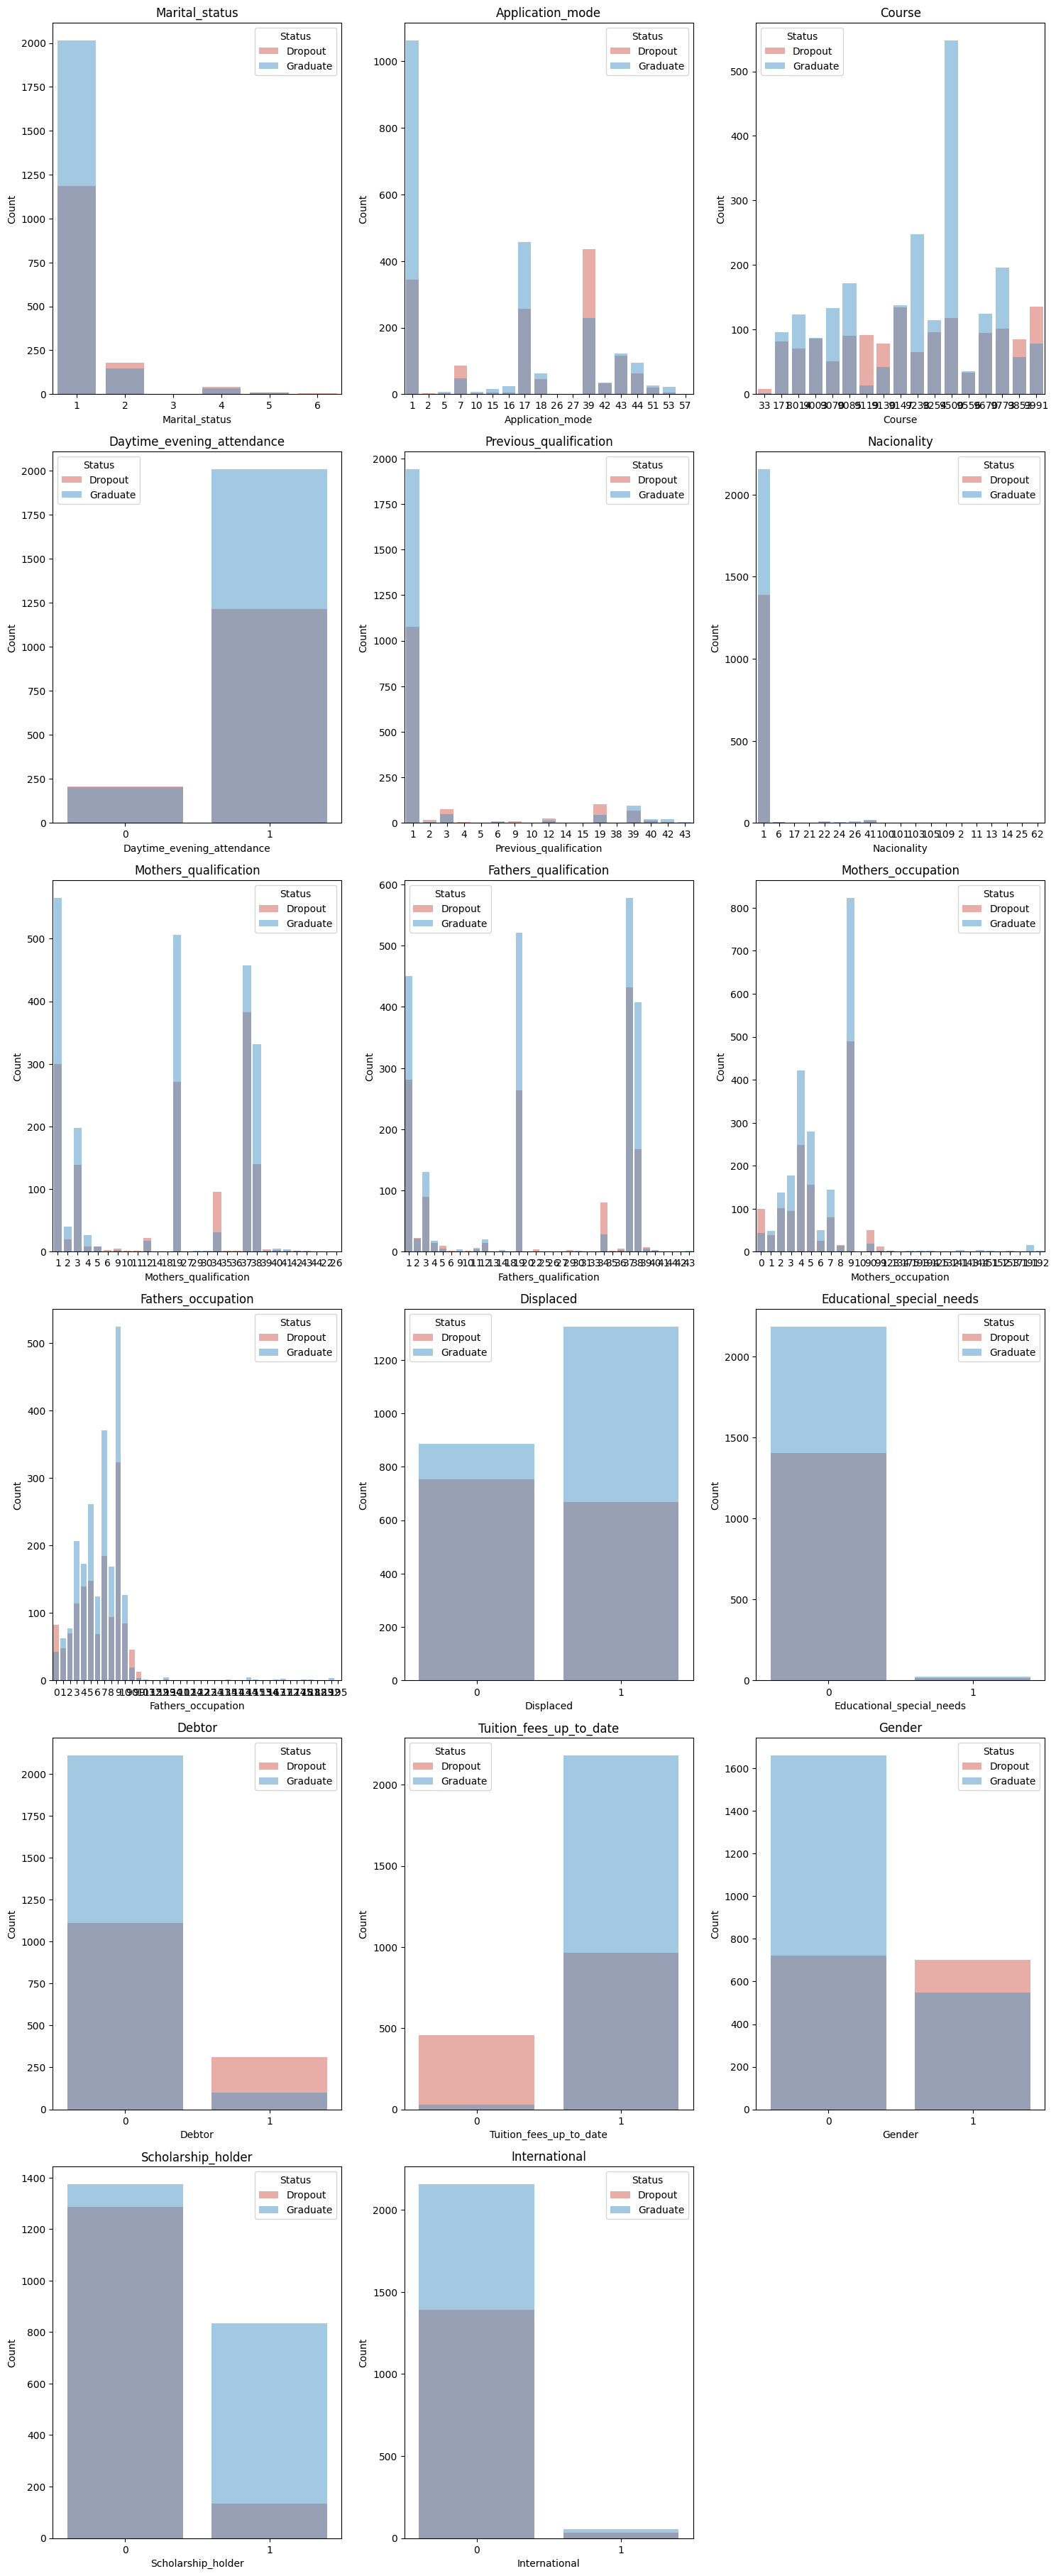

In [20]:
# Membuat palet warna kustom
colors = {'Graduate': '#3498db', 'Dropout': '#e74c3c'}

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop melalui setiap kolom kategorikal
for i, column in enumerate(categorical_columns):
    for status in df['Status'].unique():
        subset = df[df['Status'] == status]
        ax = axes[i]
        sns.countplot(x=column, data=subset, hue='Status',alpha=0.5, palette=colors, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'{column}')
        ax.legend(title='Status')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

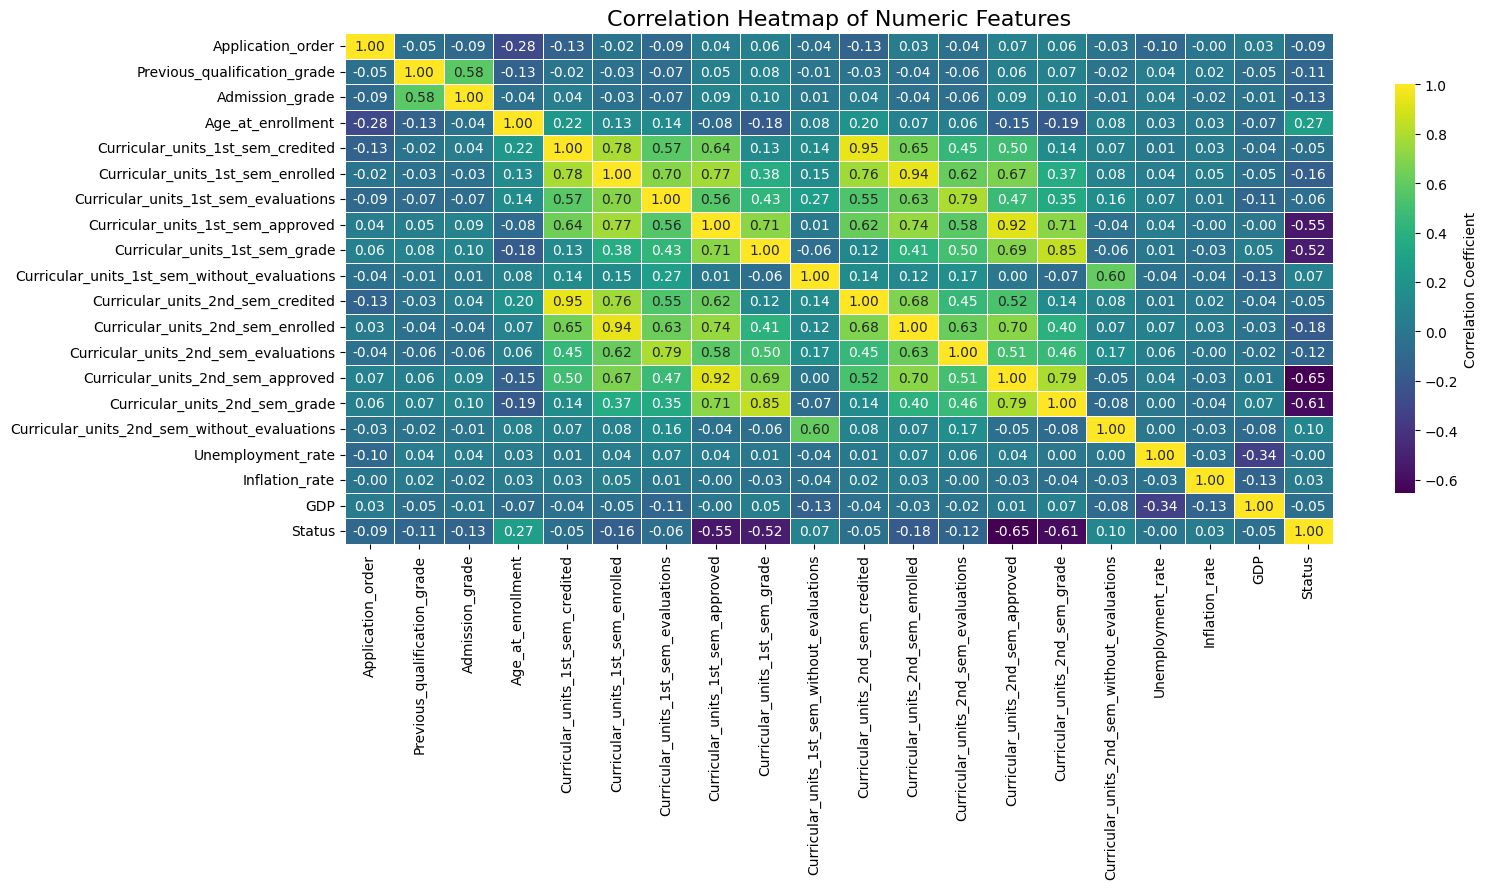

In [25]:
# Mengganti nilai 'Graduate' dengan 0 dan 'Dropout' dengan 1 dalam kolom 'Status'
df['Status'] = df['Status'].replace({'Graduate': 0, 'Dropout': 1}).astype(int)


# Menghitung matriks korelasi
correlation_matrix = df.drop(columns=categorical_columns).corr()

# Membuat heatmap dengan penyesuaian tambahan
plt.figure(figsize=(16, 9))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
    annot_kws={'size': 10}
)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Berikut adalah beberapa insight dari heatmap di atas:
1. **Korelasi Positif Tinggi**:
   - Kolom yang berhubungan dengan *Curricular units* di semester pertama dan kedua, seperti:
     - `Curricular_units_1st_sem_credited` dan `Curricular_units_1st_sem_enrolled` (korelasi ≈ 0.95).
     - `Curricular_units_2nd_sem_credited` dan `Curricular_units_2nd_sem_enrolled` (korelasi ≈ 0.96).
     - `Curricular_units_1st_sem_grade` memiliki korelasi tinggi dengan unit terkait, menunjukkan hubungan erat antara jumlah mata kuliah yang diambil dengan performa nilai.

2. **Korelasi Negatif Tinggi**:
   - Kolom `Status` (dikodekan sebagai 0 untuk *Graduate* dan 1 untuk *Dropout*) memiliki korelasi negatif sedang hingga kuat dengan:
     - `Curricular_units_1st_sem_grade` (-0.55) dan `Curricular_units_2nd_sem_grade` (-0.65). Hal ini menunjukkan bahwa mahasiswa dengan performa akademik yang lebih tinggi cenderung lulus.

3. **Korelasi Rendah**:
   - Fitur seperti `GDP`, `Inflation_rate`, dan `Unemployment_rate` memiliki korelasi yang sangat rendah (mendekati nol) dengan hampir semua variabel lain, yang mengindikasikan bahwa variabel-variabel ini kurang relevan terhadap hasil `Status`.

### **Kesimpulan Potensial:**
- **Faktor Akademik Dominan**:
  - Performa akademik pada semester pertama dan kedua, seperti nilai dan jumlah mata kuliah yang diambil atau diselesaikan, sangat memengaruhi kemungkinan kelulusan mahasiswa.
  
- **Faktor Eksternal Kurang Relevan**:
  - Faktor ekonomi makro (seperti inflasi dan GDP) tampaknya tidak memberikan pengaruh langsung terhadap kelulusan (*Status*).

- **Penggunaan untuk Prediksi**:
  - Fitur dengan korelasi kuat terhadap `Status` (misalnya, `Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_grade`, dan fitur-fitur lain terkait *Curricular units*) dapat dijadikan prioritas dalam model prediktif untuk menentukan kemungkinan kelulusan mahasiswa.


In [26]:
# Menghapus kolom kolom yang tidak akan digunakan
deleted_columns =["Unemployment_rate",
                  "GDP", "Inflation_rate", "Curricular_units_2nd_sem_evaluations",
                  "Curricular_units_2nd_sem_without_evaluations",
                  "Curricular_units_1st_sem_without_evaluations",
                  "Curricular_units_1st_sem_evaluations",
                  "Educational_special_needs","International", "Course", "Application_mode",
                  "Nacionality", "Mothers_qualification", "Fathers_qualification",
                  "Mothers_occupation", "Fathers_occupation", 'Marital_status','Age_at_enrollment',
                  "Previous_qualification"
]

In [27]:
df_train = df.drop(columns=deleted_columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Application_order                  3630 non-null   int64  
 1   Daytime_evening_attendance         3630 non-null   int64  
 2   Previous_qualification_grade       3630 non-null   float64
 3   Admission_grade                    3630 non-null   float64
 4   Displaced                          3630 non-null   int64  
 5   Debtor                             3630 non-null   int64  
 6   Tuition_fees_up_to_date            3630 non-null   int64  
 7   Gender                             3630 non-null   int64  
 8   Scholarship_holder                 3630 non-null   int64  
 9   Curricular_units_1st_sem_credited  3630 non-null   int64  
 10  Curricular_units_1st_sem_enrolled  3630 non-null   int64  
 11  Curricular_units_1st_sem_approved  3630 non-null   int64  
 1

Penjelasan proses yang terjadi di atas adalah sebagai berikut:

#### 1. **Menghapus beberapa kolom**:
   - `df_train = df.drop(columns=deleted_columns)`:
     
     Pada baris ini, DataFrame `df` diubah menjadi DataFrame baru yang disebut `df_train`. Kolom-kolom yang disebutkan dalam variabel `deleted_columns` dihapus dari DataFrame `df` dengan menggunakan fungsi `.drop(columns=...)`.

   
#### 2. **Memeriksa Informasi DataFrame (df_train.info())**:
   - `df_train.info()` digunakan untuk menampilkan ringkasan informasi mengenai DataFrame `df_train` yang telah diubah:
     - **Jumlah Baris (Entries)**: DataFrame ini sekarang berisi 3630 entri atau baris setelah penghapusan kolom.
     - **Jumlah Kolom (Columns)**: Ada 18 kolom setelah kolom-kolom yang tidak diinginkan dihapus.
     - **Non-Null Count**: Semua kolom memiliki jumlah data yang valid atau non-null sebanyak 3630, yang menunjukkan tidak ada nilai yang hilang (missing values) pada setiap kolom.
     - **Tipe Data (Dtype)**:
       Tipe data untuk kolom-kolom ini sebagian besar adalah `int64` (14 kolom) dan `float64` (4 kolom). Tipe data `int64` digunakan untuk data kategorikal yang diubah menjadi angka (misalnya: 0 atau 1), sedangkan `float64` digunakan untuk data numerik seperti grade atau nilai.

DataFrame `df_train` sekarang memiliki **18 kolom** yang semuanya memiliki nilai non-null, yang berarti tidak ada data yang hilang.

Selanjutnya data dibagi menjadi dua bagian yaitu data pelatihan dan data pengujian. Fitur (X) dipisahkan dari target (y), di mana Status adalah kolom target yang ingin diprediksi. Menggunakan fungsi train_test_split, data dibagi menjadi 80% untuk pelatihan (X_train, y_train) dan 20% untuk pengujian (X_test, y_test). Parameter random_state=42 memastikan pembagian data yang konsisten setiap kali kode dijalankan.

In [ ]:
# Split data into train and test sets
X = df_train.drop('Status', axis=1)
y = df_train['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Berikutnya adalah proses modeling, model yang digunakan adalah **Random Forest Classifier**, yang merupakan algoritma ensemble learning yang menggabungkan beberapa pohon keputusan (decision trees) untuk meningkatkan akurasi dan mengurangi overfitting. Proses dimulai dengan mendefinisikan fitur numerik yang akan diproses melalui pipeline.

**Pipeline Preprocessing** menggunakan `ColumnTransformer`, di mana fitur numerik akan distandarisasi dengan menggunakan `StandardScaler` untuk memastikan bahwa semua fitur berada dalam skala yang sama, yang penting untuk algoritma seperti Random Forest. Kolom selain fitur numerik akan dibiarkan tanpa perubahan (`remainder='passthrough'`).

Selanjutnya, sebuah **Random Forest Classifier** didefinisikan dan digabungkan dalam pipeline dengan proses preprocessing. Kemudian, **GridSearchCV** digunakan untuk mencari kombinasi hyperparameter terbaik. Grid search ini mengevaluasi berbagai kombinasi dari parameter seperti jumlah estimator (`n_estimators`), kedalaman pohon (`max_depth`), jumlah minimum sampel yang dibutuhkan untuk membagi simpul (`min_samples_split`), serta apakah bootstrap digunakan dalam pembuatan pohon (`bootstrap`).

Setelah proses pencarian hyperparameter terbaik, model yang dihasilkan dilatih menggunakan data pelatihan (`X_train`, `y_train`) dengan `grid_search.fit`. Model terbaik yang ditemukan disimpan dalam `best_model`. Kemudian, model digunakan untuk melakukan prediksi pada data pengujian (`X_test`), dan hasilnya dievaluasi menggunakan metrik akurasi (`accuracy_score`).

Terakhir, model terlatih dan scaler yang digunakan untuk preprocessing disimpan menggunakan **joblib**, sehingga dapat digunakan kembali tanpa perlu melakukan pelatihan ulang di masa depan. Model disimpan dalam file `best_trained_model.pkl` dan scaler dalam file `best_standard_scaler.pkl`.

In [31]:
# Define numerical features
numerical_features = ['Application_order', 'Previous_qualification_grade', 'Admission_grade',
                      'Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled',
                      'Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited',
                      'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved',
                      'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    [('scaler', StandardScaler(), numerical_features)],
    remainder='passthrough'
)

# Define Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Combine preprocessing and classifier into a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Set hyperparameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Save the model and preprocessor
import joblib
joblib.dump(best_model.named_steps['classifier'], 'best_trained_model.pkl')
joblib.dump(best_model.named_steps['preprocessor'].named_transformers_['scaler'], 'best_standard_scaler.pkl')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy: 0.9022038567493113


['best_standard_scaler.pkl']

Hasil dari model ini menunjukkan bahwa setelah melakukan **GridSearchCV** dengan 5-fold cross-validation untuk mengevaluasi 216 kombinasi hyperparameter, model terbaik yang diperoleh memiliki **akurasi sebesar 90.22%** pada data pengujian. Ini menunjukkan bahwa model **Random Forest Classifier** yang telah dioptimalkan dengan parameter terbaik cukup efektif dalam memprediksi status mahasiswa, dengan tingkat kesalahan yang rendah.

Selain itu, file yang disimpan, yaitu `'best_standard_scaler.pkl'`, menunjukkan bahwa **Scaler** yang digunakan untuk menstandarisasi fitur numerik selama preprocessing juga berhasil disimpan.

Lalu berikutnya melakukan generate untuk confusion matrix pada data testing

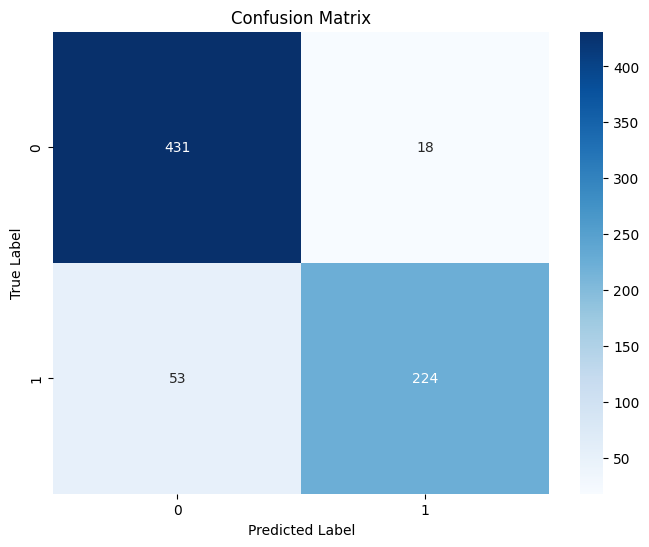

In [32]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.named_steps['classifier'].classes_, yticklabels=best_model.named_steps['classifier'].classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Berdasarkan **confusion matrix** yang ditampilkan, dapat ditarik beberapa insight berikut:

- **True Negatives (TN)**: 431. Ini berarti 431 data yang benar-benar berstatus *Graduate* diprediksi dengan benar sebagai *Graduate* oleh model.
- **False Positives (FP)**: 18. Ada 18 data yang sebenarnya berstatus *Graduate*, namun diprediksi sebagai *Dropout*.
- **False Negatives (FN)**: 53. Terdapat 53 data yang sebenarnya berstatus *Dropout*, namun diprediksi sebagai *Graduate*.
- **True Positives (TP)**: 224. Ini menunjukkan 224 data yang benar-benar berstatus *Dropout* dan diprediksi dengan benar sebagai *Dropout*.

Dari **confusion matrix** ini, kita dapat menyimpulkan beberapa hal:
- Model memiliki kesalahan yang lebih kecil dalam memprediksi **Graduate** dibandingkan **Dropout**, mengingat jumlah **False Positives** (18) lebih sedikit dibandingkan **False Negatives** (53). Hal ini mungkin menunjukkan bahwa model lebih cenderung memprediksi status **Graduate** daripada **Dropout**, yang dapat diartikan bahwa model lebih "aman" dalam memprediksi **Graduate** untuk menghindari kesalahan besar.
- Akurasi tinggi model (90.22%) mungkin sebagian besar dipengaruhi oleh jumlah **True Negatives** yang besar, sementara **False Negatives** menunjukkan bahwa model memiliki kesulitan dalam memprediksi mahasiswa yang berstatus *Dropout*.

## Evaluation

In [33]:
# Load model and encoder
model = load('best_trained_model.pkl')
standard_scaler = load('best_standard_scaler.pkl')

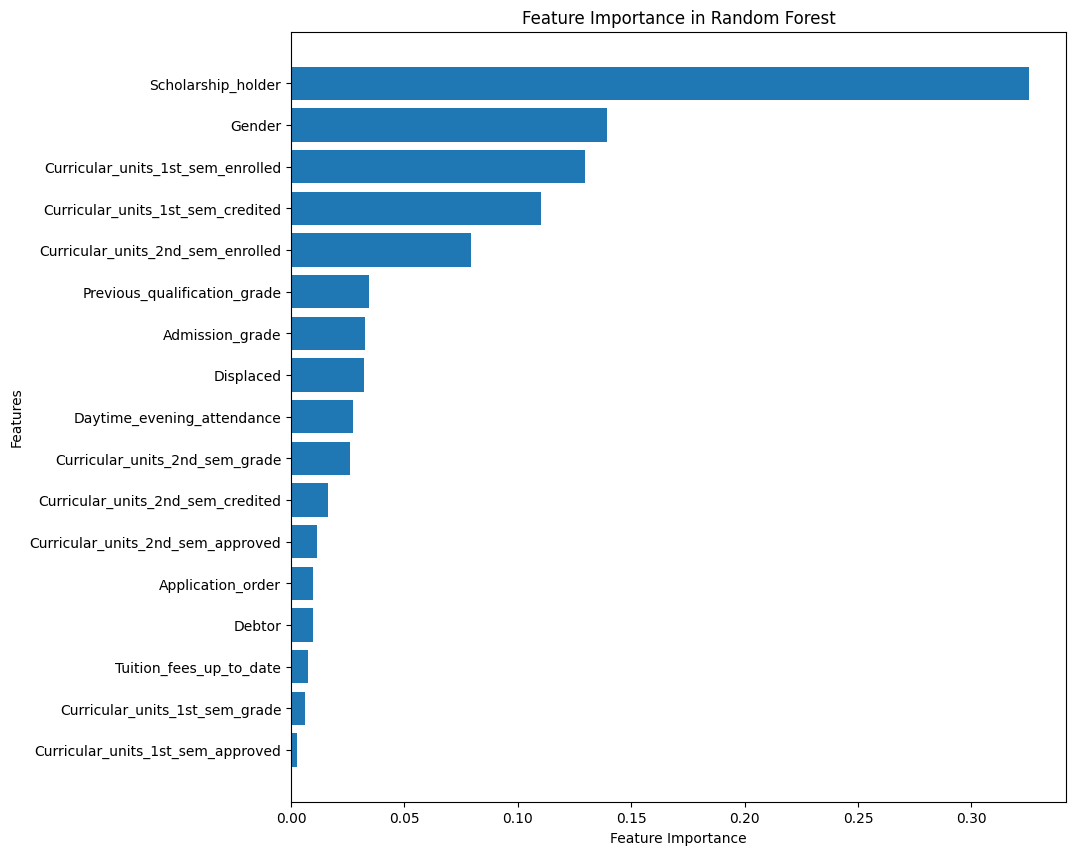

In [34]:
# Menampilkan feature importance
feature_importances = model.feature_importances_
features = X.columns

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Mengurutkan berdasarkan importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan plot
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [35]:
# ambil sepuluh fitur penting
# Mengurutkan berdasarkan importance dan ambil 10 fitur penting pertama
top_10_features = importance_df.nlargest(10, 'Importance')

# Menampilkan 10 fitur penting
print(top_10_features)

                              Feature  Importance
8                  Scholarship_holder    0.325458
7                              Gender    0.139249
10  Curricular_units_1st_sem_enrolled    0.129829
9   Curricular_units_1st_sem_credited    0.110305
14  Curricular_units_2nd_sem_enrolled    0.079476
2        Previous_qualification_grade    0.034566
3                     Admission_grade    0.032516
4                           Displaced    0.032092
1          Daytime_evening_attendance    0.027355
16     Curricular_units_2nd_sem_grade    0.025885


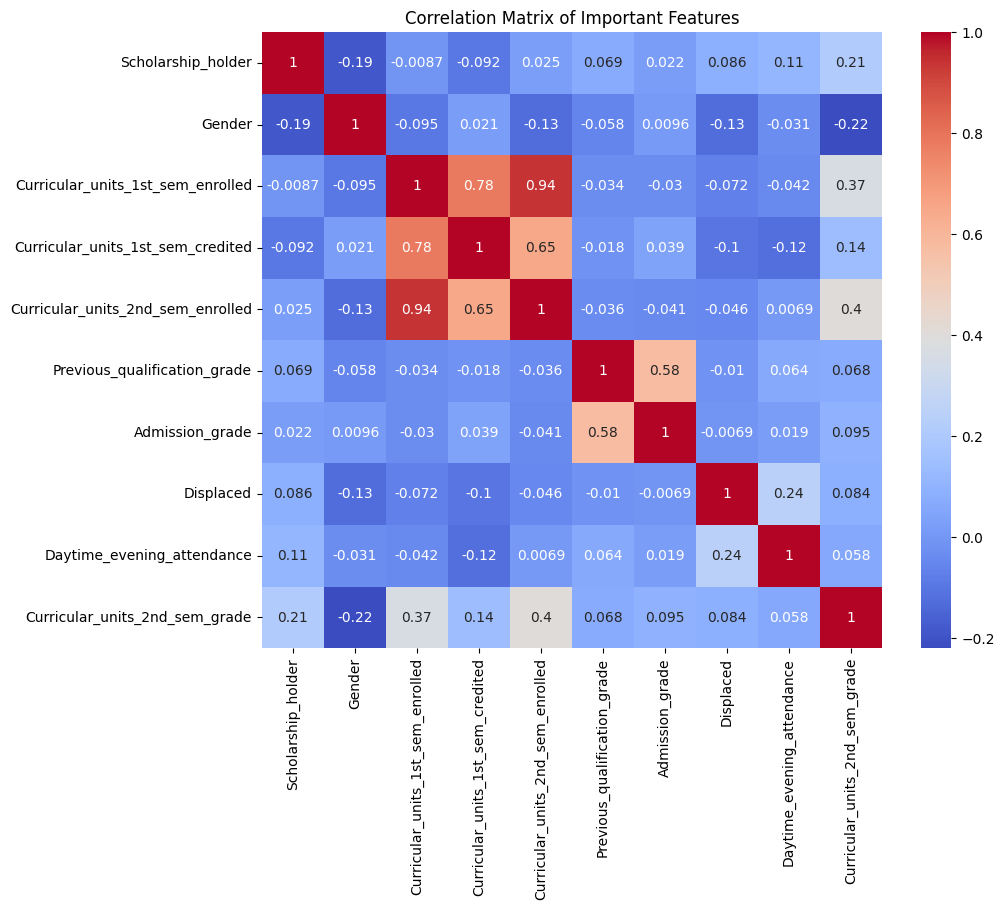

In [36]:
# Hitung matriks korelasi untuk fitur-fitur penting
correlation_matrix = df_train[top_10_features['Feature']].corr()

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Important Features')
plt.show()

In [37]:
df_enrolled = df_enrolled.reset_index(drop=True)

# Define categorical and numerical features
numerical_features = ['Application_order', 'Previous_qualification_grade', 'Admission_grade',
                      'Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled',
                      'Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited',
                      'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved',
                      'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', standard_scaler, numerical_features)
    ],
    remainder='passthrough'
)

# Add the preprocessor and model to the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit preprocessor to df_enrolled (assuming this is necessary for standard scaler)
pipeline.named_steps['preprocessor'].fit(df_enrolled.drop(deleted_columns + ['Status'], axis=1))

# Preprocess and predict using df_enrolled
y_pred_test = pipeline.predict(df_enrolled.drop(deleted_columns + ['Status'], axis=1))

# Get true labels from df_enrolled
df_enrolled['Status'] = y_pred_test

In [38]:
df_enrolled.Status.value_counts()

,count
Status,
0,438
1,356


In [39]:
# Concatenate df_train and df_enrolled to create df_final
df_final = pd.concat([df_train, df_enrolled.drop(deleted_columns,axis=1)], ignore_index=True)

# Verify the shape of df_final to ensure the concatenation was successful
print("Shape of df_final:", df_final.shape)

# Optionally, save df_final to a CSV file
df_final.to_csv('df_final.csv', index=False)

Shape of df_final: (4424, 18)


In [54]:
! pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.11.2
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.6
astropy-iers-data==0.2024.11.18.0.35.2
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.